In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import math
import seaborn as sns

sns.set_theme()

ARRAY_LENGTH = int(1e4)
LOWER_BOUND = np.sqrt(2)
UPPER_BOUND = np.e * 5

In [2]:
# Generate values with a constant step size
p0 = np.linspace(start=LOWER_BOUND, stop=UPPER_BOUND, num=ARRAY_LENGTH)

# Generate a *larger* list of numbers between LOWER_BOUND and UPPER_BOUND
# From this list, choose ARRAY_LENGTH random values 
SAMPLE_SIZE = 100
samples = np.linspace(start=LOWER_BOUND, stop=UPPER_BOUND, num=SAMPLE_SIZE * ARRAY_LENGTH)
p1 = np.array(random.sample(list(samples), ARRAY_LENGTH))

# Shuffle the indices of p0
p2 = np.random.permutation(p0)

# Print the types for verification
for name, p in zip(["p0", "p1", "p2"], [p0, p1, p2]):
    print(f"{name} list type: {type(p)}, First 5 elements: {p[:5]}")

p0 list type: <class 'numpy.ndarray'>, First 5 elements: [1.41421356 1.4154314  1.41664925 1.41786709 1.41908493]
p1 list type: <class 'numpy.ndarray'>, First 5 elements: [ 4.43198137 10.70889359  4.33922757 10.89667831  3.42367203]
p2 list type: <class 'numpy.ndarray'>, First 5 elements: [ 2.56385579  3.29821412 11.64408084  7.436439    6.7824582 ]


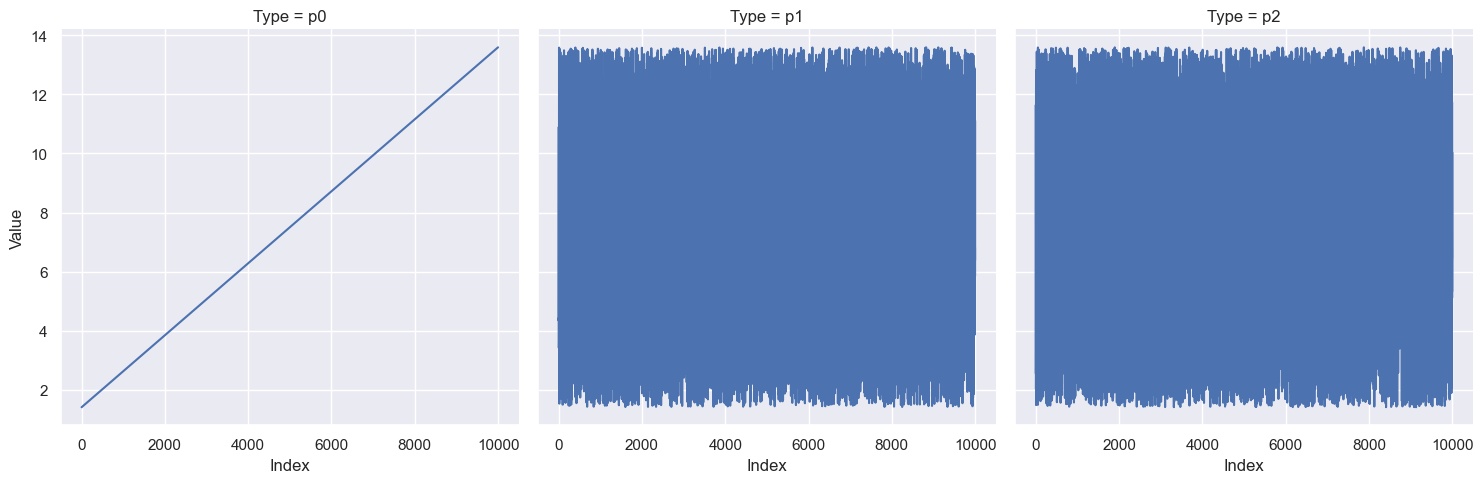

In [3]:
# plot the data
data = pd.DataFrame({'Index': range(ARRAY_LENGTH), 'p0': p0, 'p1': p1, 'p2': p2})
melted_data = data.melt(id_vars='Index', var_name='Type', value_name='Value')
sns.relplot(data= melted_data, kind='line',
    x='Index', y='Value', col="Type"
)


### p0 Distance Statistics ###
First 5 neighbor index pairs: [[0, 1], [1, 0], [2, 1], [3, 2], [4, 3]]
First 3 distances: [np.float64(0.0012178413421264356), np.float64(0.0012178413421264356), np.float64(0.0012178413421264356)]
Mean: 0.0012178413421260182
Minimum: 0.0012178413421253254
Maximum: 0.0012178413421271017

### p1 Distance Statistics ###
First 5 neighbor index pairs: [[0, 6221], [1, 5005], [2, 7232], [3, 405], [4, 53]]
First 3 distances: [np.float64(0.00028007577841382414), np.float64(0.00020701253187205282), np.float64(0.00013394928532850514)]
Mean: 0.0006046081069077051
Minimum: 1.2177207755925679e-05
Maximum: 0.005662401607064993


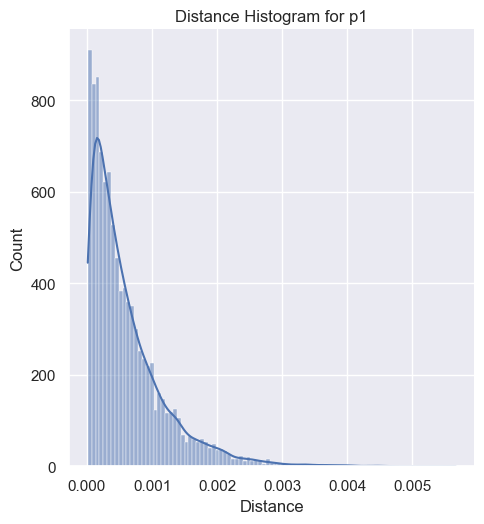


### p2 Distance Statistics ###
First 5 neighbor index pairs: [[0, 1498], [1, 9257], [2, 1749], [3, 4666], [4, 2169]]
First 3 distances: [np.float64(0.0012178413421262135), np.float64(0.0012178413421262135), np.float64(0.0012178413421253254)]
Mean: 0.0012178413421260182
Minimum: 0.0012178413421253254
Maximum: 0.0012178413421271017


In [ ]:
def find_neighbor_index(mylist: np.array, start_point) -> tuple[list[int, int], float]:
    minimum_diff = math.inf
    neighbour = None

    # Iterate through the list to find the closest value to start_point
    for value in mylist:
        if value == start_point:  # Skip the start_point
            continue
        diff = abs(start_point - value)
        if diff < minimum_diff:
            minimum_diff = diff
            neighbour = value

    if neighbour is None:
        raise ValueError("No neighbor found.")

    # Return their index values and the closest distance
    start_index = np.where(mylist == start_point)[0][0]
    neighbor_index = np.where(mylist == neighbour)[0][0]
    return [int(start_index), int(neighbor_index)], minimum_diff

def find_distances(mylist: np.array, title: str) -> list[float]:
    t, distances = [], []

    # For each value in the list, find the closest neighbor and its distance
    for _, value in enumerate(mylist):
        indices, distance = find_neighbor_index(mylist, value)
        t.append(indices)
        distances.append(distance)

    print(f"\n### {title} Distance Statistics ###")
    print(f"First 5 neighbor index pairs: {t[:5]}")
    print(f"First 3 distances: {distances[:3]}")
    print(f"Mean: {np.mean(distances)}")
    print(f"Minimum: {np.min(distances)}")
    print(f"Maximum: {np.max(distances)}")

    return distances

def plot_distances(distances, title: str):
    sns.displot(data=distances, kind="hist",
        bins="auto", kde=False, stat="count", 
    )
    # sns.rugplot(data=distances)
    plt.title(f'Distance Histogram for {title}')
    plt.xlabel('Distance')
    plt.show()

distances_p0 = find_distances(p0, "p0")

distances_p1 = find_distances(p1, "p1")
plot_distances(distances_p1, "p1")

distances_p2 = find_distances(p2, "p2")

In [5]:
# Remove every row with index 3, 6, 9, ...
p2_new = np.delete(p2, np.arange(3, len(p2), 3))
print(p2_new[:5])

# For each value in p2_new, find the closest neighbor and its distance
t, distances = [], []
for _, value in enumerate(p2_new):
    indices, distance = find_neighbor_index(p2_new, value)
    t.append(indices)
    distances.append(distance)
print(t[:5])

[ 2.56385579  3.29821412 11.64408084  6.7824582   2.02922344]
[[0, 999], [1, 6172], [2, 6182], [3, 2650], [4, 4538]]


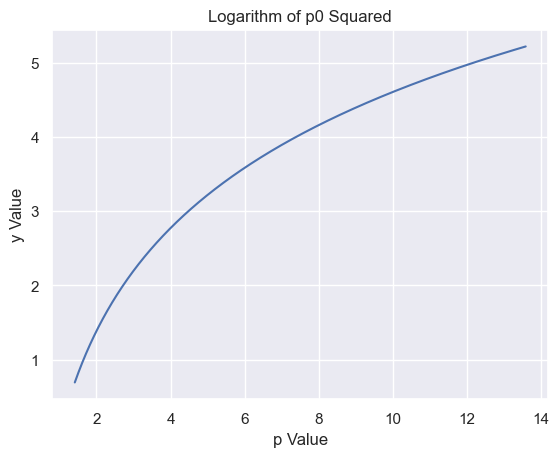

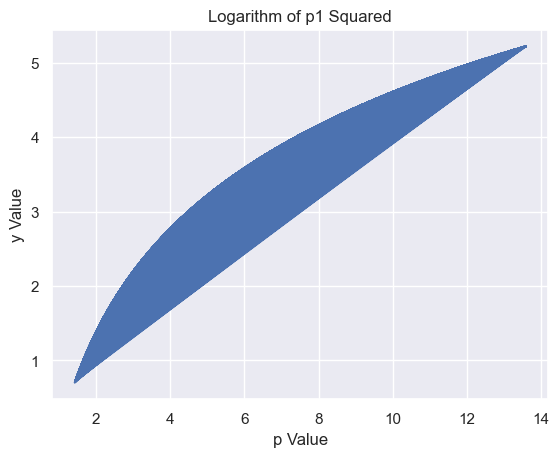

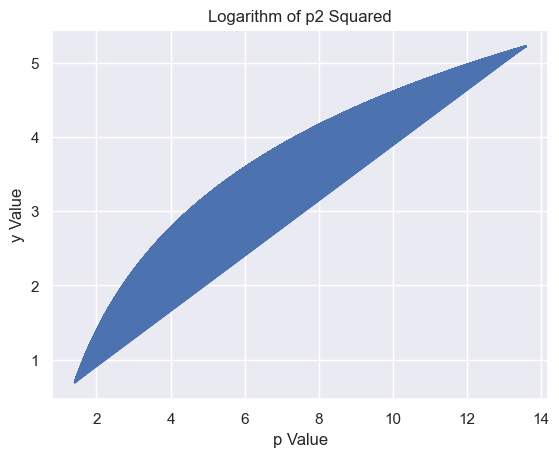

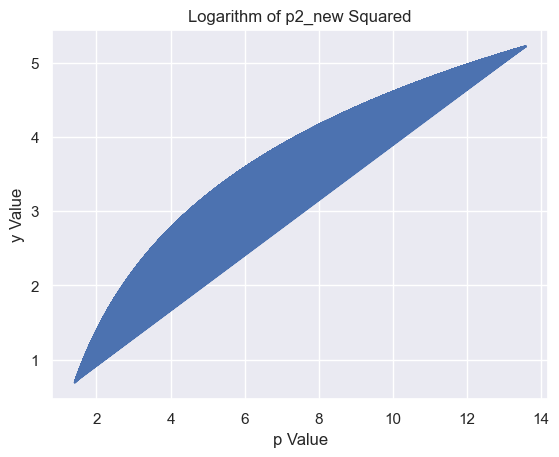

In [6]:
def log_squared(mylist: np.array) -> np.array:
    return np.log(mylist**2)

def plot_log_squared(mylist: np.array, title: str):
    y = log_squared(mylist)
    plt.plot(mylist, y)
    plt.title(f'Logarithm of {title} Squared')
    plt.xlabel('p Value')
    plt.ylabel('y Value')
    plt.show()

plot_log_squared(p0, "p0")
plot_log_squared(p1, "p1")
plot_log_squared(p2, "p2")
plot_log_squared(p2_new, "p2_new")

In [7]:
def calculate_area(mylist: np.array) -> float:
    area = np.trapezoid(y=log_squared(mylist), x=mylist)
    return area

for name, p in zip(["p0", "p1", "p2", "p2_new"], [p0, p1, p2, p2_new]):
    area = calculate_area(p)
    print(f"Area under the curve for {name}: {area}")

def integral_result(start, stop):
    upper =  2 * stop * (np.log(stop) - 1)
    lower = 2 * start * (np.log(start) - 1)
    return upper - lower

print(f"Actual integral result: {integral_result(LOWER_BOUND, UPPER_BOUND)}")

Area under the curve for p0: 45.59722713870215
Area under the curve for p1: 44.92322104439684
Area under the curve for p2: -25.863170524465666
Area under the curve for p2_new: -81.36735056931447
Actual integral result: 45.59722729530439
